<a href="https://colab.research.google.com/github/hroblesdiez/optical_vs_radar_satellite_images/blob/main/Optical_vs_radar_satellite_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this code is to establish correlation between NDVI (Normalised Difference Vegetation Index) data derived from optical satellite images and parameters derived from radar satellite images. Next, the polinomial linear regressions, which allow to model NDVI basing on radar parameters, are fixed. Finally the mean root error is calcuated in order to check the accuracy of the model. 

In [ ]:
#Connect my Google Drive to have access to the  csv file
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Create a dataframe from the csv 
import pandas as pd 
df = pd.read_csv('/content/gdrive/MyDrive/data_analysis/wykresy_parametry_orbity_ew_o_128_174.csv', sep=';')
df.head(50)

,IMG_TYPE,MEAN,CLOSEST_NDVI
0,A,11.324594,0.336532
1,A,11.544122,0.357733
2,A,NaN,NaN
3,A,12.117620,0.460001
4,A,11.214889,0.541295
5,A,7.295731,0.289467
6,A,15.755816,0.428010
7,A,13.752210,0.291468
8,A,11.511942,0.397076
9,A,10.344239,0.362086


In [ ]:
#Separate the main dataframe in dataframes by Imgage Type

df_A = df.loc[df['IMG_TYPE'] == 'A']
df_H = df.loc[df['IMG_TYPE'] == 'H']
df_L1 = df.loc[df['IMG_TYPE'] == 'L1']
df_RVI = df.loc[df['IMG_TYPE'] == 'RVI']
df_T11 = df.loc[df['IMG_TYPE'] == 'T11Rlog']
df_T12 = df.loc[df['IMG_TYPE'] == 'T12Rlog']
df_T22 = df.loc[df['IMG_TYPE'] == 'T22Rlog']

#Check if the NDVI column is the same for all the Image Type Dataframes
df_A_NDVI = df_A['CLOSEST_NDVI']
df_H_NDVI = df_H['CLOSEST_NDVI']
df_H_NDVI.reset_index(drop=True, inplace=True)
df_L1_NDVI = df_L1['CLOSEST_NDVI']
df_RVI_NDVI = df_RVI['CLOSEST_NDVI']
df_RVI_NDVI.reset_index(drop=True, inplace=True)
df_T11_NDVI = df_T11['CLOSEST_NDVI']
df_T12_NDVI = df_T12['CLOSEST_NDVI']
df_T12_NDVI.reset_index(drop=True, inplace=True)
df_T22_NDVI = df_T22['CLOSEST_NDVI']

df_A_NDVI.equals(df_RVI_NDVI)
  

True

In [ ]:
alldfs = [var for var in dir() if (isinstance(eval(var), pd.core.frame.DataFrame) & (var.startswith('df_')))]
alldfs


['df_A', 'df_H', 'df_L1', 'df_RVI', 'df_T11', 'df_T12', 'df_T22']

In [ ]:
#Clean the dataframes

#Eliminate empty values

dfs = [df_A, df_H, df_L1, df_RVI, df_T11, df_T12, df_T22]
def eliminate_empty_values():
  dfs_clean =[]
  for df in dfs :
    df_clean = df.dropna()
    dfs_clean.append(df_clean)
  return dfs_clean


df_clean = eliminate_empty_values()

df_A = df_clean[0]
df_H = df_clean[1]
df_L1 = df_clean[2]
df_RVI = df_clean[3]
df_T11 = df_clean[4]
df_T12 = df_clean[5]
df_T22 = df_clean[6]
df_H

,IMG_TYPE,MEAN,CLOSEST_NDVI
602,H,0.317739,0.336532
603,H,0.323695,0.357733
605,H,0.335012,0.460001
606,H,0.318057,0.541295
607,H,0.218190,0.289467
...,...,...,...
1199,H,0.400026,0.377947
1200,H,0.421324,0.306082
1201,H,0.324349,0.345015
1202,H,0.295637,0.306020


In [ ]:
df_A

,IMG_TYPE,MEAN,CLOSEST_NDVI
0,A,11.324594,0.336532
1,A,11.544122,0.357733
3,A,12.117620,0.460001
4,A,11.214889,0.541295
5,A,7.295731,0.289467
...,...,...,...
597,A,14.961150,0.377947
598,A,15.035906,0.306082
599,A,11.399196,0.345015
600,A,11.086050,0.306020


In [ ]:
#Linear regression with one variable (Mean of Image Type A) 
from sklearn.linear_model import LinearRegression
import numpy as np 

#Create a Linear Regression Object using the Constructor 
lm = LinearRegression()

Z = df_A[['MEAN']]
Y = df_A['CLOSEST_NDVI']

#Fit the model to find the parameters b0,b1 ...
lm.fit(Z, Y)

Yhat = lm.predict(Z)

#Obtain R²
print('R²', lm.score(Z, Y))

#Get the params
print('Coef', lm.coef_)

#Get the RMSE (root mean square error) to evaluate the model performance. 

from sklearn.metrics import mean_squared_error
mlr_rmse = np.sqrt(mean_squared_error(Y, Yhat))
print('RSME', mlr_rmse)

R² 0.11381201449375267
Coef [0.01837311]
RSME 0.14280019792541848


In [ ]:
#Function to obtain a dataframe with all the means of all the Image Type, with columns renamed
dfs = [df_A, df_H, df_L1, df_RVI, df_T11, df_T12, df_T22]

def get_dataframes_list(list) :
  dfs_renamed = []
  for item in list:
    name =[x for x in globals() if globals()[x] is item][0]
    name = name[3:]
    item = item.rename(columns={'IMG_TYPE': 'IMG_TYPE_'+name, 'MEAN': 'MEAN_'+name, 'CLOSEST_NDVI':'NDVI_'+name})
    item.reset_index(drop=True, inplace=True)
    dfs_renamed.append(item)
  return dfs_renamed

dfs_list = get_dataframes_list(dfs)

dfs = pd.concat([df for df in dfs_list], axis=1, )
dfs = dfs.copy()
dfs




,IMG_TYPE_A,MEAN_A,NDVI_A,IMG_TYPE_H,MEAN_H,NDVI_H,IMG_TYPE_L1,MEAN_L1,NDVI_L1,IMG_TYPE_RVI,...,NDVI_RVI,IMG_TYPE_T11,MEAN_T11,NDVI_T11,IMG_TYPE_T12,MEAN_T12,NDVI_T12,IMG_TYPE_T22,MEAN_T22,NDVI_T22
0,A,11.324594,0.336532,H,0.317739,0.336532,L1,7.923931,0.336532,RVI,...,0.336532,T11Rlog,18.222089,0.336532,T12Rlog,15.500274,0.336532,T22Rlog,15.335632,0.336532
1,A,11.544122,0.357733,H,0.323695,0.357733,L1,7.710820,0.357733,RVI,...,0.357733,T11Rlog,17.730447,0.357733,T12Rlog,15.038199,0.357733,T22Rlog,14.896887,0.357733
2,A,12.117620,0.460001,H,0.335012,0.460001,L1,7.854809,0.460001,RVI,...,0.460001,T11Rlog,18.058776,0.460001,T12Rlog,15.409045,0.460001,T22Rlog,15.297636,0.460001
3,A,11.214889,0.541295,H,0.318057,0.541295,L1,8.083367,0.541295,RVI,...,0.541295,T11Rlog,18.589460,0.541295,T12Rlog,15.842609,0.541295,T22Rlog,15.719371,0.541295
4,A,7.295731,0.289467,H,0.218190,0.289467,L1,7.044569,0.289467,RVI,...,0.289467,T11Rlog,16.211220,0.289467,T12Rlog,13.144915,0.289467,T22Rlog,12.721621,0.289467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,A,14.961150,0.377947,H,0.400026,0.377947,L1,7.650662,0.377947,RVI,...,0.377947,T11Rlog,17.572835,0.377947,T12Rlog,15.087989,0.377947,T22Rlog,15.144165,0.377947
566,A,15.035906,0.306082,H,0.421324,0.306082,L1,7.047795,0.306082,RVI,...,0.306082,T11Rlog,16.194949,0.306082,T12Rlog,13.718225,0.306082,T22Rlog,13.860690,0.306082
567,A,11.399196,0.345015,H,0.324349,0.345015,L1,7.848668,0.345015,RVI,...,0.345015,T11Rlog,18.049474,0.345015,T12Rlog,15.316027,0.345015,T22Rlog,15.195263,0.345015
568,A,11.086050,0.306020,H,0.295637,0.306020,L1,7.738489,0.306020,RVI,...,0.306020,T11Rlog,17.792133,0.306020,T12Rlog,15.075201,0.306020,T22Rlog,14.780517,0.306020


In [ ]:
#Linear regression for image types T11, T12 and T22

#Create a Linear Regression Object using the Constructor 
lm = LinearRegression()

Z = dfs[['MEAN_T11','MEAN_T12', 'MEAN_T22',]]
Y = dfs['NDVI_A']

#Fit the model to find the parameters b0,b1 ...
lm.fit(Z, Y)

#Obtain a prediction
Yhat = lm.predict(Z) 

#Obtain R²
print('R2', lm.score(Z, Y))

#Get the params
print('Coef', lm.coef_)

#Get the intercept
print('Intercept', lm.intercept_)

#Get the RMSE (root mean square error) to evaluate the model performance. 

from sklearn.metrics import mean_squared_error
mlr_rmse = np.sqrt(mean_squared_error(Y, Yhat))
print('RSME', mlr_rmse)


R2 0.4312385342514603
Coef [ 0.2470716  -0.75189735  0.61177628]
Intercept -1.7181743682856947
RSME 0.11440130086381203


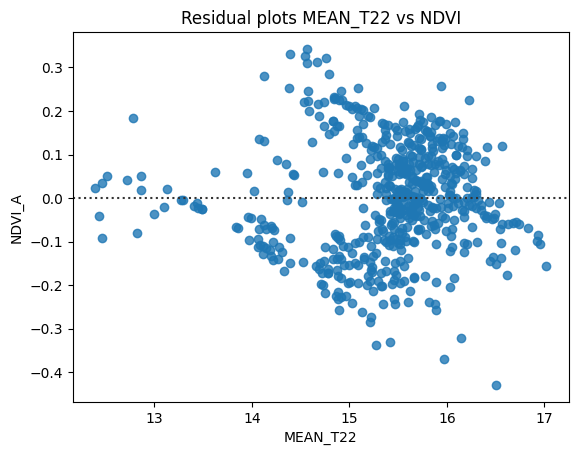

In [ ]:
#Residual plots
import seaborn as sns
g = sns.residplot(x=dfs['MEAN_T22'], y=Y, data=dfs[['MEAN_T22', 'NDVI_A']], dropna=True).set(title='Residual plots MEAN_T22 vs NDVI')

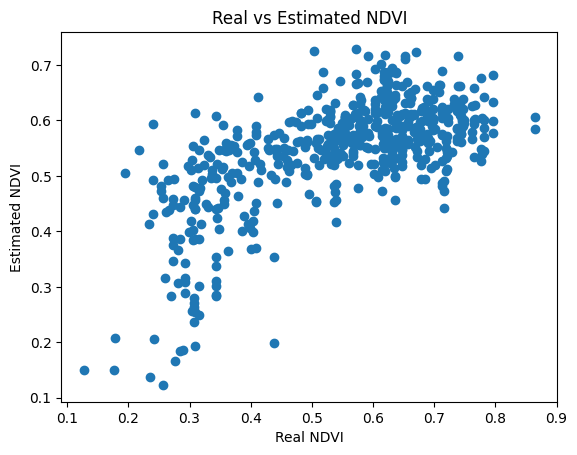

In [ ]:
#Analizying linear relationship real NDVI  and estimated NDVI

import matplotlib.pyplot as plt
x=Y
y=Yhat
plt.title("Real vs Estimated NDVI")
plt.xlabel("Real NDVI")
plt.ylabel("Estimated NDVI")
plt.scatter(x,y)

In [ ]:
#Polynomial regression

#1. Determining the degree of the polynomial (2 as first approach just to test)
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=3, include_bias=False)

X = dfs[['MEAN_T11','MEAN_T12', 'MEAN_T22',]]
Y = dfs['NDVI_A']

#2. Creating the new features. Defining the training and the test data
from sklearn.model_selection import train_test_split
x_poly = pr.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size=0.3, random_state=42)

#3. Creating the polynomial regression model
poly_reg_model = LinearRegression()

# Fit the model to the training data
poly_reg_model.fit(X_train, Y_train)

y_predicted = poly_reg_model.predict(X_train)

#See how well our model will predict responses based on feature values it hasn’t seen before 
poly_reg_y_predicted = poly_reg_model.predict(X_test)

#Get the RMSE (root mean square error) to evaluate the model performance. RMSE shows how far the values of the model predicts (poly_reg_y_predicted) are from the true values (Y_test), on average
from sklearn.metrics import mean_squared_error

poly_reg_rmse_train = np.sqrt(mean_squared_error(Y_train, y_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(Y_test, poly_reg_y_predicted))

print('RMSE POLYNOMIAL TRAIN', poly_reg_rmse_train)
print('RMSE POLYNOMIAL TEST', poly_reg_rmse_test)

RMSE POLYNOMIAL TRAIN 0.1045194801422223
RMSE POLYNOMIAL TEST 0.11062725087857446
